In [1]:
import numpy as np, pandas as pd
import re

In [2]:
# Stednavne
stednavne = pd.read_csv('stednavne.csv', sep=';', encoding='ANSI')

stednavne2 = stednavne[stednavne['Type'] == 'By']
#stednavne2['KommuneKode'] = int(stednavne2['KommuneKode'])
#print(stednavne2.head())

# kommuner, landsdele
kommuner = pd.read_excel('kommuner.xls')
#print(kommuner.head())

# Samlet stednavn, kommune, landsdel, region
stednavn3 = pd.merge(stednavne2, kommuner, how='inner', left_on=('KommuneKode'), right_on=('k_kode'))
stednavn4 = stednavn3[['Navn', 'kommune', 'k_kode', 'RegionNavn', 'RegionKode', 'landsdel', 'l_kode']]
#print(stednavn4.head())


dict_komm = pd.Series(list(stednavn3.kommune), index=list(stednavn3.Navn)).to_dict()
dict_landsdel = pd.Series(list(stednavn3.landsdel), index=list(stednavn3.Navn)).to_dict()
dict_region = pd.Series(list(stednavn3.RegionNavn), index=list(stednavn3.Navn)).to_dict()


In [4]:
sted='Søndbjerg'
dict_landsdel[sted]

'Vestjylland'

In [3]:
dict_special = {'Kgs. Lyngby': 'Københavns omegn', 
                'Grønland': 'Grønland', 
                'Brøndby': 'Københavns omegn',
                'Udlandet': 'Udlandet', 
                'Århus': 'Østjylland',
                'Copenhagen': 'Byen København', 
                'Bagsværd': 'Københavns omegn', 
                'Risskov': 'Østjylland', 
                'Allerød': 'Nordsjælland', 
                'Storkøbenhavn': 'Byen København', 
                'Fyn': 'Fyn', 
                'Brønshøj': 'Byen København', 
                'Dyssegård, Gladsaxe': 'Københavns omegn', 
                'Bornholm': 'Bornholm', 
                'Åbyhøj': 'Østjylland', 
                'Brabrand': 'Østjylland', 
                'Tilst': 'Østjylland', 
                'Stenløse': 'Nordsjælland',
                'Egå': 'Østjylland', 
                'Hasselager': 'Østjylland', 
                'Nykøbing Sj': 'Vest- og Sydsjælland', 
                'Nykøbing Sj.': 'Vest- og Sydsjælland', 
                'Nykøbing Sjælland': 'Vest- og Sydsjælland', 
                'Ølstykke': 'Nordsjælland', 
                'Hellerup, København': 'Københavns omegn', 
                'Karlslunde': 'Østsjælland', 
                'Smørum': 'Københavns omegn', 
                'Vallensbæk': 'Københavns omegn', 
                'Tranbjerg J': 'Østjylland', 
                'Vedbæk': 'Nordsjælland', 
                'Espergærde': 'Nordsjælland', 
                'Blåvand': 'Sydjylland', 
                'Samsø': 'Østjylland', 
                'Allerød, Hillerød': 'Nordsjælland', 
                'Broby': 'Fyn', 
                'Løsning': 'Østjylland', 
                'Sisimiut': 'Grønland', 
                'Silkeborg, Viborg': 'Østjylland', 
                'Allinge': 'Bornholm', 
                'Gladsaxe, Herlev': 'Københavns omegn', 
                'Fanø': 'Sydjylland', 
                'Rømø': 'Sydjylland', 
                'Holmegaard': 'Vest- og Sydsjælland',
                'Fårevejle': 'Vest- og Sydsjælland', 
                'Langå, Randers': 'Østjylland',
                'Qaqortoq': 'Grønland',
                'Rungsted Kyst': 'Nordsjælland', 
                'Klampenborg': 'Københavns omegn', 
                'Færøerne': 'Færøerne', 
                'Ilulissat': 'Grønland', 
                'Hvalsø': 'Vest- og Sydsjælland', 
                'Herfølge': 'Vest- og Sydsjælland', 
                'Henne': 'Sydjylland', 
                'Thyholm': 'Vestjylland', 
                'Herning, Holstebro': 'Vestjylland', 
                'Snekkersten': 'Nordsjælland',
                'Dyssegård': 'Københavns omegn', 
                'Maniitsoq': 'Grønland', 
                'Sydals': 'Sydjylland',
                'Kangerlussuaq': 'Grønland'}

dict_landsdel.update(dict_special)



In [5]:
ny1 = pd.read_pickle('both1.pkl')
ny2 = pd.read_pickle('both2.pkl')
ny3 = pd.read_pickle('both3.pkl')
ny4 = pd.read_pickle('both4.pkl')
ny5 = pd.read_pickle('both5.pkl')

df_both = pd.concat([ny1, ny2, ny3, ny4, ny5], axis=0, join='inner', ignore_index=True)

print(df_both.describe())
df_both_sample = df_both.sample(1000, random_state=1)

print(df_both_sample.head())

                       date job_title job_describ     city             company
count               1025180   1025180     1025180  1025180             1025180
unique                 1461    616779      749523     4039              140459
top     2007-12-06 00:00:00   Pædagog                       Københavns Kommune
freq                   2842      3908       53235    77916                7879
first   2007-01-01 00:00:00       NaN         NaN      NaN                 NaN
last    2010-12-31 00:00:00       NaN         NaN      NaN                 NaN
             date                                          job_title  \
530049 2007-10-18  Taxi Chauffør søges. Til kørsel ved Taxa Selan...   
819946 2007-06-29  FTZ Autodele & Værktøj A/S søger 1 ny lagermed...   
806655 2010-05-12                          Grid requirement engineer   
124205 2009-01-28  Assisterende centerleder til plejecenter Atriu...   
47777  2009-08-13                                    Lærer/overlærer   

              

In [5]:
def fetch_landsdel(key) :
    try :
        ld = dict_landsdel[key]
    except :        
        k = find_hidden(strip_comma(key))
        try :
            ld = dict_landsdel[k[0]]
        except:
            try :
                ld = dict_landsdel[k[1]]
            except :
                try :
                    ld = dict_landsdel[k[2]]
                except :
                    if key in [' ','Uoplyst'] :
                        ld = 'Uoplyst'
                    else :
                        ld = np.nan
    return ld
    
def find_hidden(key) :
    try :
        first = key.split()
    except :
        first = key
    return first

def strip_comma(key) :
    k1 = re.sub('/', " ", key)
    k2 = re.sub('ae', "æ", k1)
    k3 = re.sub('Å', "Aa", k2)
    k4 = re.sub('-', " ", k3)
    k5 = re.sub('oe', "ø", k4)
    return re.sub(',', "", k5)
    
df_both['landsdel'] = df_both['city'].apply(lambda x: fetch_landsdel(x))

len(df_both[df_both.landsdel.isnull()])
#42014


42014

In [6]:
from collections import Counter

ukendt_by = df_both[df_both['landsdel'].isnull()]['city']

print(len(pd.unique(ukendt_by)))
print(Counter(ukendt_by))




756
Counter({'Region Midtjylland': 9945, 'Region Sjælland': 7298, 'Region Nordjylland': 4369, 'Danmark': 4051, 'Sydjylland': 3409, 'Norge': 2797, 'Tyskland': 871, 'Luxembourg': 660, 'USA': 536, 'Østrig': 290, 'Qatar': 285, 'Schweiz': 273, 'Finland': 244, 'Australien': 224, 'Kina': 174, 'Irland': 167, 'Belgien': 157, 'Bjert': 155, 'Tisvildeleje': 130, 'Spanien': 129, 'Holland': 126, 'Vemmelev': 120, 'Canada': 117, 'Upernavik': 117, 'Hundige': 113, 'Agedrup': 112, 'Nuuk': 111, 'Italien': 105, 'Uummannaq': 105, 'Aasiaat': 101, 'Paamiut': 95, 'Ålsgårde': 91, 'Singapore': 91, 'Island': 90, 'Fur': 86, 'Tjekkiet': 80, 'Indien': 76, 'Storbritannien': 76, 'Tasiilaq': 71, 'Vietnam': 65, 'Japan': 64, 'Nanortalik': 61, 'Asperup': 58, 'Vejers Strand': 56, 'Avedøre': 56, 'Köpenhamn': 55, 'Kenya': 51, 'Tureby': 49, 'Narsaq': 46, 'Nordfyn': 45, 'Tanzania': 45, 'Uganda': 44, 'Angola': 43, 'Malaysia': 43, 'Bangladesh': 42, 'Stilling': 42, 'Nykøbing Mors': 41, 'Jordan': 38, 'Københavns vestegn': 38, 'Nyk

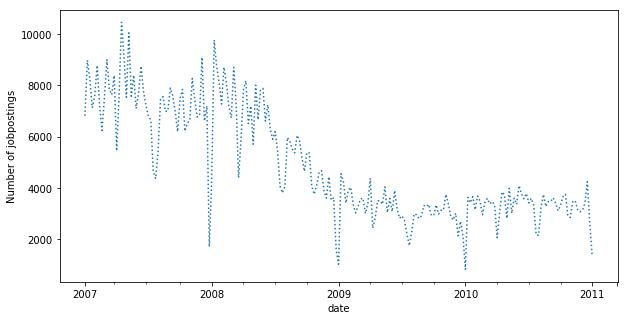

In [18]:
#per = df_both.['date'].dt.to_period("M")
a = df_both.copy()
a.set_index(['date'], inplace=True)
test = a.groupby(level=(0)).size()
#a.reset_index()

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Date')
ax.set_ylabel('Number of jobpostings')

#plt.hist2d(df_both['date'], df_both['landsdel'])

test.resample('W').sum().plot(style=':')
plt.savefig('weekly_postings.png')
